# Pêndulo simples

Jeanlex Soares de Sousa (jeanlex@fisica.ufc.br) <br>
Departamento de Física <br>
Universidade Federal do Ceará

# Movimento sem atrito

O movimento de um pêndulo simples de massa $m$ preso a uma corda sem massa de comprimento $L$ e sob a ação somente da força da gravidade $\vec{P}$ e tração da corda $\vec{T}$ é descrito pela seguinte equação:

$$m\frac{d^2 \vec{r}}{ d t^2} = \vec{P} + \vec{T}$$

Como o movimento do pêndulo acontece em duas coordenadas, pode-se tirar proveito da simetria circular do problema, e descrever a posição do pêndulo em coordenadas polares:

$$ \vec{r} = L \hat{r} + L\theta \hat{\theta} $$

onde $\hat{r}$ é um vetor unitário na direção radial (em relação ao ponto que a corda está fixada no suporte vertical), e $\hat{\theta}$ é um vetor unitário tangencial. Neste sistema de coordenadas, a tração tem sempre direção radial $\vec{T} = - T \hat{r}$, enquanto a força peso pode ser decomposta  da seguinte forma $\vec{P} = P_r \hat{r} + P_\theta \hat{\theta}$.



A equação diferencial torna-se:

$$m \frac{d^2}{d t^2}\left( L \hat{r} + L \theta \hat{\theta}\right) = (P_r - T) \hat{r} + P_\theta \hat{\theta}$$

Separando as equações por nas direções principais, temos:

* Direção $\hat{r}$: a força resultante é nula pois não há movimento na direção radial (no sentido do comprimento do fio). Logo:

$$ T = P_r = m g \cos \theta $$

* Direção $\hat{\theta}$: a projeção $P_\theta = P\sin \theta$ da força peso faz com que o pêndulo se mova na direção tangencial $\hat{\theta}$. Se $\theta > 0$ ($\theta < 0$), $P_\theta$ aponta no sentido negativo (positivo). A equação do movimento movimento:

$$ \frac{d^2 \theta}{d t^2} =  - \frac{g}{L} \sin \theta $$

Na forma acima, a equação diferencial está na forma não-linear em $\theta$ e é válida para qualquer valor de $\theta$. Limitando-se o movimento do pêndulo a pequenos ângulos, podemos aproximar $\sin \theta \approx \theta$, e a equação torna-se:

$$ \frac{d^2 \theta}{d t^2} =  - \frac{g}{L} \theta $$

Esta equação possui solução analítica

$$ x(t) = A \cos (\omega_0 t + \phi)$$

onde

$$\omega_0 = \sqrt{\frac{g}{L}}$$



### Implementação computacional

O movimento do pêndulo é descrito por uma equação diferencial de segunda ordem, que pode ser dividida em duas equação diferenciais de primeira ordem:

$$ \omega = \frac{d \theta}{dt} $$

$$ \frac{d \omega}{dt} = -\frac{g}{L} \theta $$

Esta equações diferenciais podem ser discretizadas da usando-se a derivada progressiva:

$$ \theta_{i+1} =  \theta_{i} + \omega_{i+1} \Delta t $$

$$ \omega_{i+1} =  \omega_{i} - \Delta t \frac{g}{L} \theta_i $$

Note que a discretização de $\omega = d\theta / dt$ não assumiu a forma tradicional $ \theta_{i+1} =  \theta_{i} + \omega_{i} \Delta t $. A forma tradicional leva a erros numéricos que serão discutidos noutra oportunidade. A forma $ \theta_{i+1} =  \theta_{i} + \omega_{i+1} \Delta t $ corrige estes erros.



# Movimento com atrito

É possivel estudar o movimento do pêndulo com uma força de atrito proporcional a velocidade $\vec{F}_{at} = -b \vec{v}$. Pela simetria do movimento esta força aponta sempre na direção tangencial $\hat{\theta}$ no sentido oposto ao movimento $\vec{F}_{at} = -b L \omega \hat{\theta}$. Incluindo-se este termo na equação do movimento, obtemos a seguinte equação para movimento do pêndulo:

$$ \frac{d^2 \theta}{d t^2} = - \frac{b}{m} \frac{d \theta}{d t} - \frac{g}{L} \theta = 0$$

Esta equação possui 3 tipos de solução:

* Movimento super-amortecido ($b/2m > \omega_0$): $\theta(t) = A e^{-(b/m) t}e^{-\omega't} $

* Movimento criticamente amortecido ($b/2m = \omega_0$): $\theta(t) = A e^{-(b/m) t} $

* Movimento sub-amortecido ($b/2m < \omega_0$): $\theta(t) = A e^{-(b/m) t} \cos (\omega't + \phi)$

onde $\omega'= \sqrt{|(b/m)^2-\omega_0^2|}$. Um estudo mais de talhado de como obter estas soluçoes pode ser encontrado [aqui](./aula_10_oscilacoes_amortecidas.ipynb).



### Implementação computacional

Esta pode ser dividida em duas equação diferenciais de primeira ordem:

$$ \omega = \frac{d \theta}{dt} $$

$$ \frac{d \omega}{dt} = - \frac{b}{m}\omega -\frac{g}{L} \theta $$

Esta equações diferenciais podem ser discretizadas da usando-se a derivada progressiva:

$$ \theta_{i+1} =  \theta_{i} + \omega_{i+1} \Delta t $$

$$ \omega_{i+1} =  \omega_{i}\left( 1 - \frac{b}{m}\Delta t\right) - \Delta t \frac{g}{L} \theta_i $$



# Pêndulo forçado

Além da força de gravidade e atrito, é possível aplicar uma força externa do tipo $F = F_0 e^{i \omega_D t}$ onde $\omega_D$ é a frequência da força externa. A equação resultante é:

$$ \frac{d^2 \theta}{d t^2} = - \frac{b}{m} \frac{d \theta}{d t} - \frac{g}{L} \theta + \frac{F_0}{m} e^{i \omega_D t}$$

A solução mais geral possível desta equação é a combinação da equação homogênea com a solução da equação homogênea. A solução particular, assume que o pêndulo vai oscilar com frequência $\omega_D$  e é dada por:

$$ \theta(t) = A e^{i\omega_D t}$$

Substituindo-se esta solução na equação do movimento tem-se:

$$\left(-\omega_D^2 + i\omega_d \frac{b}{m} +\omega_0^2\right)A  = \frac{F_0}{m} $$

A amplitude do movimento é dada por:

$$ A = \frac{F_0}{m} \frac{1}{(\omega_0^2 - \omega_D^2) + i (b/m)\omega_D} =  Re[A] + i Im[A]$$

$$ A = \frac{F_0}{m}\left[ \frac{(\omega_0^2 - \omega_D^2) - i (b/m)\omega_D}{(\omega_0^2 - \omega_D^2)^2 +  (b/m)^2\omega_D^2}\right] = Re[A] + i Im[A]$$

Utilizando-se a fórmula de Euler, temos $ A = |A| e^{i\phi t} $, a solução particular do oscilador harmônico forçado torna-se:

$$ \theta(t) = |A| e^{i \omega_D t + \phi}$$

onde

$$ |A|  = \frac{(F_0/m)}{\sqrt{(\omega_0^2 - \omega_D^2)^2 +  (b/m)^2\omega_D^2}}$$

$$ \tan \phi = -\frac{(b/m)\omega_D}{\omega_0^2 - \omega_D^2}$$


Note que: 
* Somente a parte real ou imaginária desta solução fazem sentido físico. 
* O movimento forçado não está fora de fase em relação a força externa
* A amplitude do movimento depende da intensidade da força externa e da relação entre a frequência externa $\omega_D$ e a frequência natural de vibração $\omega_0$.


### Implementação computacional

A equação do movimento do pêndulo forçado ser dividida em duas equações diferenciais de primeira ordem:

$$ \omega = \frac{d \theta}{dt} $$

$$ \frac{d \omega}{dt} = - \frac{b}{m}\omega -\frac{g}{L} \theta + \frac{F_0}{m}\cos \omega_D t $$

Esta equações diferenciais podem ser discretizadas da usando-se a derivada progressiva:

$$ \theta_{i+1} =  \theta_{i} + \omega_{i+1} \Delta t $$

$$ \omega_{i+1} =  \omega_{i}\left( 1 - \frac{b}{m}\Delta t\right) - \Delta t \frac{g}{L} \theta_i + \frac{F_0}{m}\cos \omega_D t_i $$

$$ t_{i+1} = t_i + \Delta t$$



## Solução numérica do movimento amortecido

In [10]:
# loading libraries 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# assigning input variables

dt = 0.005        # time step increment
nt = 500          # number of time steps
Tmax = (nt-1)*dt  # Total simulation time 


theta0 = 10       # in degrees (initial angular position, it will be converted to radians)
v0     = 0        # in rad/sec (initial angular velocity) 
L      = 0.1      # pendulum length
mass   = 1        # in kg (projectile mass)
g      = 10       # in m/s^2 (gravity acceleration)

w0 = np.sqrt(g/L) # natural oscillation frequency 
                  # of the pendulum


In [11]:
# defining a function that calculates the whole 
# time iteration of the diffencial equation 

def NumericalSolution(t,theta0,omega0,mass,L,q,method):
    
    # --------------------------------------------------------------------------
    # OBS: this function uses the value of g and dt that has has been declared 
    # as global variables outside of this function. THE INPUT VARIABLE METHOD
    # DEFINES THE TYPE OF DISCRETIZATION.
    # method = 1 - conventional Euler method (progressive differentiation). 
    #              is not good for oscillatory problems because it cannot 
    #              satisfy energy conservation (because of numerical errors)
    # method = 2 - slight modification on Euler method that satisfies
    #              energy conservation (only in the differential equation of
    #              theta. See the book !)
    # --------------------------------------------------------------------------
    
    # find the number of time steps
    nsteps = len(t)  
    
    # transform initial angular position ot radians
    theta0rad = theta0*np.pi/180
    
    # array initialization    
    angle_pos = np.zeros(nsteps)  # array of angle positions      
    angle_vel = np.zeros(nsteps)  # array of angle velocities      
    energy    = np.zeros(nsteps)  # array of total energy      

    # defining initial conditions
    angle_pos[0] = theta0rad
    angle_vel[0] = omega0
    energy[0] = 0.5*mass*L**2*(omega0**2 + (g/L)*theta0rad**2)

    # iterating loop starting at second array position 
    for i in range(1,nsteps):
        
        angle_vel[i] = angle_vel[i-1]*(1-q*dt) - (g/L) * angle_pos[i-1]*dt
        
        if method==1:
            angle_pos[i] = angle_pos[i-1] + angle_vel[i-1]*dt
        else:
            angle_pos[i] = angle_pos[i-1] + angle_vel[i]*dt
        
        
        energy[i] = 0.5*mass*L**2*(angle_vel[i]**2 + (g/L)*angle_pos[i]**2)
    
    return angle_pos,angle_vel,energy


### Comparação dos métodos de discretização

No gráfico abaixo, é possível notar que a derivada progressiva convencional provoca um aumento espúrio da amplitude. Fisicamente, isto só seria possível se houvesse uma fonte d energia alimentando o pêndulo. 

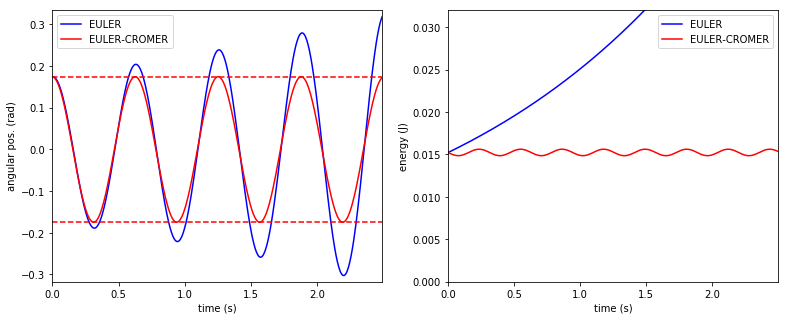

In [22]:
# ------------------------------------------------------
# MAIN PROGRAM
# ------------------------------------------------------

# damping parameter 
q0 = 0

# array of time steps t_i (all filled with zeros)
time = np.linspace(0,Tmax,nt)


# calculating the simple pedulum movement with EULER METHOD
# where energy is not conserved
theta,omega,energy = NumericalSolution(time,theta0,v0,mass,L,q0,1)

# calculating the simple pedulum movement with CROMER-EULER METHOD
# where energy is conserved
theta1,omega1,energy1 = NumericalSolution(time,theta0,v0,mass,L,q0,2)

# ------------------------------------------------------
# plotting graphs
# ------------------------------------------------------

fig, axes = plt.subplots(1,2,figsize=(13,5))

axes[0].plot(time,theta,'b-',
         time,theta1,'r-',
         time,theta0*(np.pi/180)*np.ones(time.shape),'r--',
         time,-theta0*(np.pi/180)*np.ones(time.shape),'r--')
axes[0].axis([0, np.max(time), 1.05*np.min(theta), 1.05*np.max(theta)])
axes[0].set_xlabel('time (s)')
axes[0].set_ylabel('angular pos. (rad)')
axes[0].legend(['EULER','EULER-CROMER'])


axes[1].plot(time,energy,'b-',time,energy1,'r-')
axes[1].axis([0, np.max(time), 0, 2.05*np.max(energy1)])
axes[1].set_xlabel('time (s)')
axes[1].set_ylabel('energy (J)')
axes[1].legend(['EULER','EULER-CROMER'])

plt.show()


### Comparação dos diferentes regimes do movimento amortecido

O gráfico abaixo mostra a simulação do pêndulo nos casos em que ele descreve os movimentos super-amortecido, criticamente amortecido e sub-amortecido. 

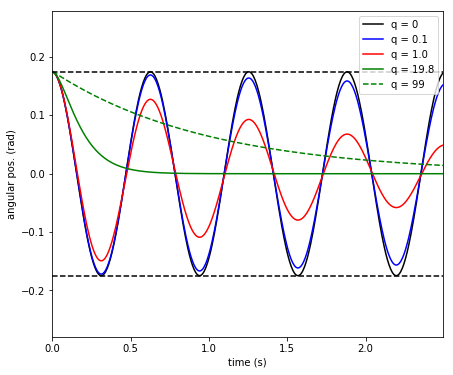

In [44]:
# ------------------------------------------------------
# MAIN PROGRAM
# ------------------------------------------------------

# array of time steps t_i (all filled with zeros)
time = np.linspace(0,Tmax,nt)

# calculating the simple pedulum movement 
# with EULER-CROMER METHOD q = 0.0
q0 = 0
thetaq0,omegaq0,energyq0 = NumericalSolution(time,theta0,v0,mass,L,q0,2)

# calculating the simple pedulum movement 
# with EULER-CROMER METHOD q = 0.1
q1 = 0.1
thetaq1,omegaq1,energyq1 = NumericalSolution(time,theta0,v0,mass,L,q1,2)

# calculating the simple pedulum movement 
# with EULER-CROMER METHOD q = 1
q2 = 1
thetaq2,omegaq2,energyq2 = NumericalSolution(time,theta0,v0,mass,L,q2,2)

# calculating the simple pedulum movement 
# with EULER-CROMER METHOD q = 10
q3 = 10
thetaq3,omegaq3,energyq3 = NumericalSolution(time,theta0,v0,mass,L,q3,2)

# calculating the simple pedulum movement 
# with EULER-CROMER METHOD q = 2 sqrt(g/l)
q4 = 2*mass*np.sqrt(g/L)
thetaq4,omegaq4,energyq4 = NumericalSolution(time,theta0,v0,mass,L,q4,2)

# calculating the simple pedulum movement 
# with EULER-CROMER METHOD q = 5*qcrit
q5 = 5*q4
thetaq5,omegaq5,energyq5 = NumericalSolution(time,theta0,v0,mass,L,q5,2)

# ------------------------------------------------------
# PLOTTING GRAPHS
# ------------------------------------------------------

fig, axes = plt.subplots(1,1,figsize=(7,6))

axes.plot(time,thetaq0,'k-', time,thetaq1,'b-',
             time,thetaq2,'r-', time,thetaq4,'g-',
             time,thetaq5,'g--',
             time,+theta0*(np.pi/180)*np.ones(time.shape),'k--',
             time,-theta0*(np.pi/180)*np.ones(time.shape),'k--')

axes.set_xlim([0, np.max(time)])
axes.set_ylim([1.6*np.min(theta1), 1.6*np.max(theta1)])
axes.set_xlabel('time (s)')
axes.set_ylabel('angular pos. (rad)')
plt.legend(['q = 0','q = 0.1','q = 1.0','q = 19.8', 'q = 99'])
plt.show()



### Animando o movimento do pêndulo

Nossa simulução permite calculare a posição angular exata dopêndulo em vários instante de tempos diferentes. Podemos tirar proveito destes dados e construir uma animação do movimento do pêndulo. O algorítmo básico é o seguinte: 


Para cada instante $t_i$ da simulação:
 1. Assumindo que o a origem dos eixos cartesianos está no ponto mais baixo da trajetória, calcule as coordenadas cartesianas da posição do pêndulo a partir da posição angular $\theta_i$:
    
    * $ x_i = L \sin \theta_i $
    * $ y_i = L(1 - \cos \theta_i) $

 2. Plote um cículo nas coordenadas cartesianas $(x_i,y_i)$
 3. Plote uma linha ligando as coordenadas $(0,0)$ até $(x_i,y_i)$ para representar a corda
 4. Desenhe uma linha horizontal $(-L/4,L)$ até $(+L/4,L)$ para simular o suporte onde a corda está presa
 5. Salvar a imagem do gráfico (frame) que representa o instante $t_i$
 
No final da simulação, deve-se combinar todas imagens em um vídeo ou gif animado. Para mais detalhes, cheque na documentação da biblioteca de [matplotlib](https://matplotlib.org/api/animation_api.html).    

        




In [48]:
# ---------------------------------------------------------
# loading animation library
# ---------------------------------------------------------

import matplotlib.animation as animation

# ---------------------------------------------------------
# function that calculates the coordinates of the pêndulum
# for a given angle theta and coord size L
# ---------------------------------------------------------

def XYPos(L,angpos):
    
    xi = L*np.sin(angpos)
    yi = L*(1-np.cos(angpos))
    
    return xi,yi

# ---------------------------------------------------------
# function that generates the collection of frames
# for a collection of pendulum positions
# ---------------------------------------------------------

def AnimatePendulum(L,xp,yp):

    # obtaining the number of time steps
    nt = len(xp)  

    # empty list of frames
    imf = []

    # creating empty graph and fixing coordinates 
    fig = plt.figure()
    plt.axis([-L/2, L/2, -0.01, 1.05*L])

    # loop on each time step
    for i in np.arange(nt):
    
        # coordinates of the support generation
        xt = [-L/4,L/4]
        yt  = [L,L]
    
        # coordinates of the coord generation
        xc = [0, xp[i]]
        yc = [L, yp[i]]
    
        # plot the graph with the position at intant t_i and append
        # image to the collection of frames. 
        # NOTE THAT WITHOUT THE COMMAND plt.show()
        # the image does not appear in the screen and 
        # is created only in the computer memory
    
        imf.append(  plt.plot(xt,yt,'-k',xc,yc,'-k',xp[i],yp[i],'or')   )


    # after generation of all frames, they are combined in an object    
    anim = animation.ArtistAnimation(fig, imf, interval=42, repeat_delay=3000, blit=True)

    return anim

    

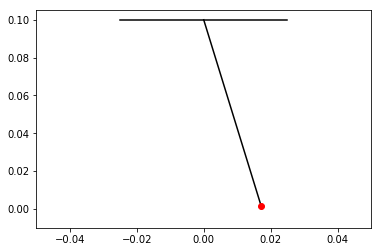

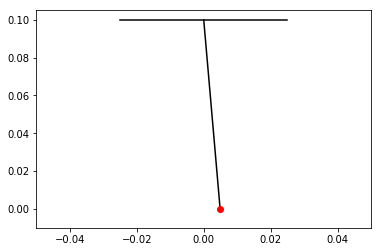

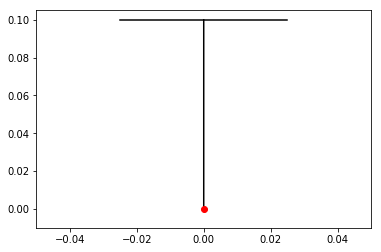

In [49]:
# ---------------------------------------------------------
# calculating the coordinates for the simulations with 
# different values of damping
# ---------------------------------------------------------

x0,y0 = XYPos(L,thetaq0)  # q = 0
anim0 = AnimatePendulum(L,x0,y0)

anim0.save('q0.mp4')

x1,y1 = XYPos(L,thetaq2)  # q = 1
anim1 = AnimatePendulum(L,x1,y1)

anim1.save('q1.mp4')

x2,y2 = XYPos(L,thetaq3)  # q = 10
anim2 = AnimatePendulum(L,x2,y2)

anim2.save('q10.mp4')

